  MLP WITH KERAS

Building image classifier using sequential API


1.Loading the data from Fashion MNSIT

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist
x_train,y_train = x_train[:-7000],y_train[:-7000]
x_valid,y_valid = x_train[-7000:],y_train[-7000:]


In [3]:
x_train.shape,x_train.dtype

((53000, 28, 28), dtype('uint8'))

In [4]:
x_train,x_test,x_valid = x_train/255.0,x_test/255.0,x_valid/255.0

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

Building the model 

In [6]:
tf.random.set_seed(42)
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
    
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Training and evaluating the model

In [9]:
h = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1657/1657 [==============================] - 8s 4ms/step - loss: 0.4825 - accuracy: 0.8270 - val_loss: 0.3916 - val_accuracy: 0.8556
Epoch 2/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.3653 - accuracy: 0.8658 - val_loss: 0.3280 - val_accuracy: 0.8797
Epoch 3/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.3291 - accuracy: 0.8797 - val_loss: 0.2911 - val_accuracy: 0.8969
Epoch 4/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.3044 - accuracy: 0.8879 - val_loss: 0.2834 - val_accuracy: 0.8936
Epoch 5/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.2861 - accuracy: 0.8945 - val_loss: 0.2783 - val_accuracy: 0.8973
Epoch 6/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.2735 - accuracy: 0.8975 - val_loss: 0.2443 - val_accuracy: 0.9077
Epoch 7/30
1657/1657 [==============================] - 8s 5ms/step - loss: 0.2577 - accuracy: 0.9032 - val_loss: 0.2512 - val_accuracy:

Plotting the learning curves

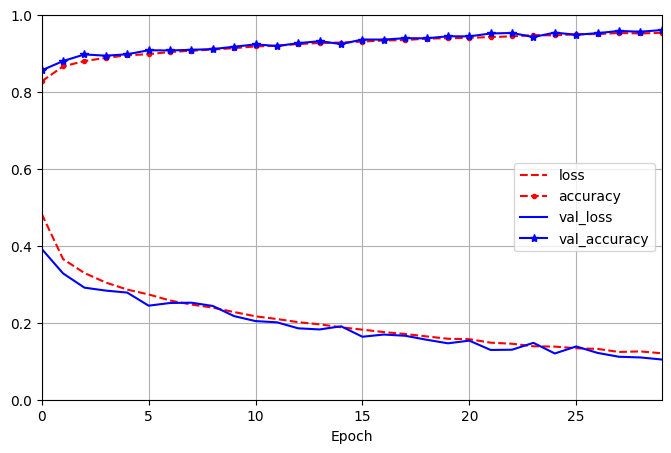

In [10]:
pd.DataFrame(h.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4711 - accuracy: 0.8904


[0.4710826277732849, 0.8903999924659729]

Using the model to make predictions

In [14]:
X_new = x_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 112ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Comparing test_new and y_proba

In [15]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [16]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [17]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)